In [45]:
#lstm using next word prediction in tensorflow

In [44]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Dropout,Activation
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
text="""
Deep Learning tutorial covers the basics and more advanced topics, 
making it perfect for beginners and those with experience. 
Whether you just starting or looking to expand your knowledge,
this guide makes it easy to learn about the different technologies of Deep Learning.
Deep Learning is a branch of Artificial Intelligence that enables machines to learn from large amounts of data.
It uses neural networks with many layers to automatically find patterns and make predictions.
It is very useful for tasks like image recognition, language translation, and speech processing.
Deep learning models learn directly from data, without the need for manual feature extraction.
Popular applications of Deep Learning include self-driving cars, chatbots, medical image analysis, and recommendation systems.
"""

In [3]:
text

'\nDeep Learning tutorial covers the basics and more advanced topics, \nmaking it perfect for beginners and those with experience. \nWhether you just starting or looking to expand your knowledge,\nthis guide makes it easy to learn about the different technologies of Deep Learning.\nDeep Learning is a branch of Artificial Intelligence that enables machines to learn from large amounts of data.\nIt uses neural networks with many layers to automatically find patterns and make predictions.\nIt is very useful for tasks like image recognition, language translation, and speech processing.\nDeep learning models learn directly from data, without the need for manual feature extraction.\nPopular applications of Deep Learning include self-driving cars, chatbots, medical image analysis, and recommendation systems.\n'

In [4]:
tokenizer=Tokenizer()

In [5]:
tokenizer.fit_on_texts([text])

In [6]:
tokenizer.word_index.items()

dict_items([('deep', 1), ('learning', 2), ('and', 3), ('it', 4), ('to', 5), ('of', 6), ('the', 7), ('for', 8), ('learn', 9), ('with', 10), ('is', 11), ('from', 12), ('data', 13), ('image', 14), ('tutorial', 15), ('covers', 16), ('basics', 17), ('more', 18), ('advanced', 19), ('topics', 20), ('making', 21), ('perfect', 22), ('beginners', 23), ('those', 24), ('experience', 25), ('whether', 26), ('you', 27), ('just', 28), ('starting', 29), ('or', 30), ('looking', 31), ('expand', 32), ('your', 33), ('knowledge', 34), ('this', 35), ('guide', 36), ('makes', 37), ('easy', 38), ('about', 39), ('different', 40), ('technologies', 41), ('a', 42), ('branch', 43), ('artificial', 44), ('intelligence', 45), ('that', 46), ('enables', 47), ('machines', 48), ('large', 49), ('amounts', 50), ('uses', 51), ('neural', 52), ('networks', 53), ('many', 54), ('layers', 55), ('automatically', 56), ('find', 57), ('patterns', 58), ('make', 59), ('predictions', 60), ('very', 61), ('useful', 62), ('tasks', 63), ('li

In [7]:
total_words=len(tokenizer.word_index)+1

In [8]:
total_words

88

In [9]:
vector_corpus=[]
for line in text.split('\n'):
    vector=tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(vector)):
        text=vector[:i+1]
        vector_corpus.append(text)


In [10]:
vector_corpus

[[1, 2],
 [1, 2, 15],
 [1, 2, 15, 16],
 [1, 2, 15, 16, 7],
 [1, 2, 15, 16, 7, 17],
 [1, 2, 15, 16, 7, 17, 3],
 [1, 2, 15, 16, 7, 17, 3, 18],
 [1, 2, 15, 16, 7, 17, 3, 18, 19],
 [1, 2, 15, 16, 7, 17, 3, 18, 19, 20],
 [21, 4],
 [21, 4, 22],
 [21, 4, 22, 8],
 [21, 4, 22, 8, 23],
 [21, 4, 22, 8, 23, 3],
 [21, 4, 22, 8, 23, 3, 24],
 [21, 4, 22, 8, 23, 3, 24, 10],
 [21, 4, 22, 8, 23, 3, 24, 10, 25],
 [26, 27],
 [26, 27, 28],
 [26, 27, 28, 29],
 [26, 27, 28, 29, 30],
 [26, 27, 28, 29, 30, 31],
 [26, 27, 28, 29, 30, 31, 5],
 [26, 27, 28, 29, 30, 31, 5, 32],
 [26, 27, 28, 29, 30, 31, 5, 32, 33],
 [26, 27, 28, 29, 30, 31, 5, 32, 33, 34],
 [35, 36],
 [35, 36, 37],
 [35, 36, 37, 4],
 [35, 36, 37, 4, 38],
 [35, 36, 37, 4, 38, 5],
 [35, 36, 37, 4, 38, 5, 9],
 [35, 36, 37, 4, 38, 5, 9, 39],
 [35, 36, 37, 4, 38, 5, 9, 39, 7],
 [35, 36, 37, 4, 38, 5, 9, 39, 7, 40],
 [35, 36, 37, 4, 38, 5, 9, 39, 7, 40, 41],
 [35, 36, 37, 4, 38, 5, 9, 39, 7, 40, 41, 6],
 [35, 36, 37, 4, 38, 5, 9, 39, 7, 40, 41, 6, 1],
 

In [11]:
max_length=max([len(vec) for vec in vector_corpus])

In [12]:
max_length

18

In [13]:
pad=np.array(pad_sequences(vector_corpus,maxlen=max_length))

In [14]:
pad

array([[ 0,  0,  0, ...,  0,  1,  2],
       [ 0,  0,  0, ...,  1,  2, 15],
       [ 0,  0,  0, ...,  2, 15, 16],
       ...,
       [ 0,  0,  0, ..., 14, 85,  3],
       [ 0,  0,  0, ..., 85,  3, 86],
       [ 0,  0, 77, ...,  3, 86, 87]])

In [15]:
x=pad[:,:-1]
x

array([[ 0,  0,  0, ...,  0,  0,  1],
       [ 0,  0,  0, ...,  0,  1,  2],
       [ 0,  0,  0, ...,  1,  2, 15],
       ...,
       [ 0,  0,  0, ..., 84, 14, 85],
       [ 0,  0,  0, ..., 14, 85,  3],
       [ 0,  0, 77, ..., 85,  3, 86]])

In [16]:
y=pad[:,-1]
y

array([ 2, 15, 16,  7, 17,  3, 18, 19, 20,  4, 22,  8, 23,  3, 24, 10, 25,
       27, 28, 29, 30, 31,  5, 32, 33, 34, 36, 37,  4, 38,  5,  9, 39,  7,
       40, 41,  6,  1,  2,  2, 11, 42, 43,  6, 44, 45, 46, 47, 48,  5,  9,
       12, 49, 50,  6, 13, 51, 52, 53, 10, 54, 55,  5, 56, 57, 58,  3, 59,
       60, 11, 61, 62,  8, 63, 64, 14, 65, 66, 67,  3, 68, 69,  2, 70,  9,
       71, 12, 13, 72,  7, 73,  8, 74, 75, 76, 78,  6,  1,  2, 79, 80, 81,
       82, 83, 84, 14, 85,  3, 86, 87])

In [17]:
y.shape

(110,)

In [18]:
y=np.array(to_categorical(y,num_classes=total_words))

In [19]:
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [20]:
y[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [21]:
y.shape[1]

88

In [22]:
model=Sequential()
model.add(Embedding(total_words,50,input_length=max_length-1))
model.add(LSTM(32,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1],activation='softmax'))

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [23]:
y.shape[1]

88

In [24]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((88, 17), (22, 17), (88, 88), (22, 88))

In [28]:
x_train

array([[ 0,  0,  0, ...,  1,  2, 15],
       [ 0,  0,  0, ..., 14, 85,  3],
       [ 0,  0,  0, ...,  7, 17,  3],
       ...,
       [ 0,  0,  0, ..., 66, 67,  3],
       [ 0,  0,  0, ..., 54, 55,  5],
       [ 0,  0,  0, ...,  5, 32, 33]])

In [29]:
x_test

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        21],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 77, 78,
         6],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 26, 27, 28, 29, 30,
        31],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2, 70,
         9],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4, 51, 52, 53, 10,
        54],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 35, 36,
        37],
       [ 0,  0,  0,  0,  0,  0,  1,  2, 11, 42, 43,  6, 44, 45, 46, 47,
        48],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  2, 11, 42, 43,  6, 44, 45,
        46],
       [ 0,  0,  0,  0,  0, 77, 78,  6,  1,  2, 79, 80, 81, 82, 83, 84,
        14],
       [ 0,  0,  0,  0,  0,  0,  0,  4, 51, 52, 53, 10, 54, 55,  5, 56,
        57],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2, 70,  9, 71, 12, 13,
        72],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  

In [30]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
earlyStopping=EarlyStopping(monitor='val_accuracy',patience=100,restore_best_weights=True)

In [34]:
early_stopping=EarlyStopping(monitor='accuracy',patience=100,restore_best_weights=True)

In [35]:
history=model.fit(x_train,y_train,validation_split=(0.2),callbacks=[early_stopping],epochs=150)

Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - accuracy: 0.0189 - loss: 4.4768 - val_accuracy: 0.0000e+00 - val_loss: 4.4791
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0403 - loss: 4.4708 - val_accuracy: 0.0000e+00 - val_loss: 4.4816
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0936 - loss: 4.4641 - val_accuracy: 0.0000e+00 - val_loss: 4.4847
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1164 - loss: 4.4548 - val_accuracy: 0.0000e+00 - val_loss: 4.4889
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0410 - loss: 4.4456 - val_accuracy: 0.0000e+00 - val_loss: 4.4956
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0410 - loss: 4.4336 - val_accuracy: 0.0000e+00 - val_loss: 4.5094
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0331 - loss: 4.4132 - val_accuracy: 0.0000e+00 - val_loss: 4.5425
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0598 - loss: 4.3594 - val

In [36]:
import matplotlib.pyplot as plt

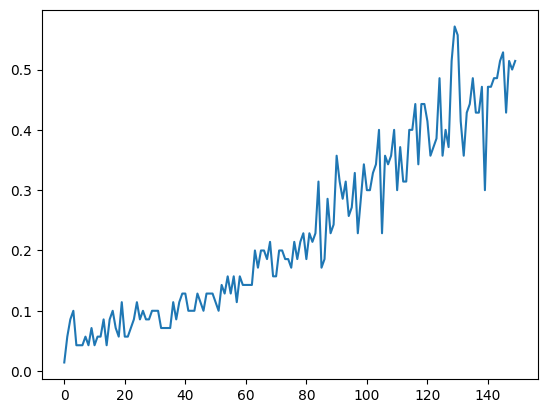

In [37]:
plt.plot(history.history['accuracy'])

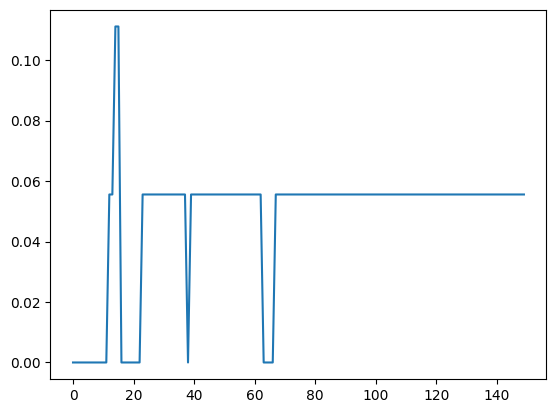

In [38]:
plt.plot(history.history['val_accuracy'])

In [39]:
import numpy as np

In [40]:
for word,index in tokenizer.word_index.items():
    print(word,index)

deep 1
learning 2
and 3
it 4
to 5
of 6
the 7
for 8
learn 9
with 10
is 11
from 12
data 13
image 14
tutorial 15
covers 16
basics 17
more 18
advanced 19
topics 20
making 21
perfect 22
beginners 23
those 24
experience 25
whether 26
you 27
just 28
starting 29
or 30
looking 31
expand 32
your 33
knowledge 34
this 35
guide 36
makes 37
easy 38
about 39
different 40
technologies 41
a 42
branch 43
artificial 44
intelligence 45
that 46
enables 47
machines 48
large 49
amounts 50
uses 51
neural 52
networks 53
many 54
layers 55
automatically 56
find 57
patterns 58
make 59
predictions 60
very 61
useful 62
tasks 63
like 64
recognition 65
language 66
translation 67
speech 68
processing 69
models 70
directly 71
without 72
need 73
manual 74
feature 75
extraction 76
popular 77
applications 78
include 79
self 80
driving 81
cars 82
chatbots 83
medical 84
analysis 85
recommendation 86
systems 87


In [54]:
def prediction(data):
    token=tokenizer.texts_to_sequences([data])[0]
    if len(token)>max_length:
        token=token[-(max_length):]
    else:
        pad_vec=pad_sequences(np.array([token]),padding='pre',maxlen=max_length)
        predicts=model.predict(pad_vec)
        #print(predicts.shape)
        max_num=np.argmax(predicts,axis=1)
        for word,index in tokenizer.word_index.items():
            if index==max_num:
                return word
        return None

In [55]:
text1="Popular applications of Deep Learning include self"
print(prediction(text1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
driving


In [52]:
#lstm=>it has both long term and short term memory 
#lstm=>it has a conveyer belt called cell state or memory state it contains info of long senetence
#lstm has three states
# forgot gate=>forgot gate forgot some information and it contain pointwise multiplication with memory or cell state
#input and cadidate gate=>it will add some information in the cell state and it contain pointwise addition
#ouput gate=>give output to hidden state ht


In [51]:
#lstm variants
# peephole=>connections=>
# from memory cell to =>forgot gate,input gate,output gate it is called peephole connections 

In [50]:
#coupling forgot and input gate Another
#(1-ft)

In [49]:
#gru=>gated recurrent unit